In [2]:
from scipy.signal import firwin
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Impulsantwort')

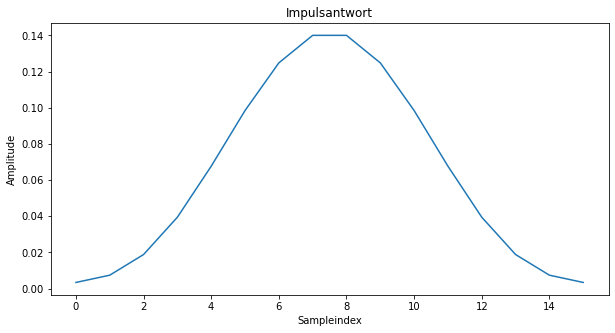

In [29]:
#Calc Coeffs

fs = 200e3
N_taps = 16
Cutoff = 10e3

b = firwin(N_taps, Cutoff/100000)

#Plot Taps
plt.figure(figsize=(10,5))
plt.plot(b)
plt.ylabel('Amplitude')
plt.xlabel('Sampleindex')
plt.title('Impulsantwort')



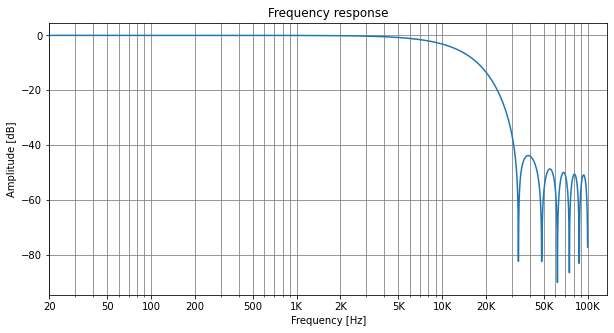

In [30]:
# Plot Magnitude Response

w, h = signal.freqz(b=b)
x = w * fs * 1.0 / (2 * np.pi)
y = 20 * np.log10(abs(h))
plt.figure(figsize=(10,5))
plt.semilogx(x, y)
plt.ylabel('Amplitude [dB]')
plt.xlabel('Frequency [Hz]')
plt.title('Frequency response')
plt.grid(which='both', linestyle='-', color='grey')
plt.xticks([20, 50, 100, 200, 500, 1000, 2000, 5000, 10000, 20000, 50000, 100000], ["20", "50", "100", "200", "500", "1K", "2K", "5K", "10K", "20K", "50K", "100K"])
plt.show()

In [33]:
#Try on Signal
from scipy.signal import butter, lfilter
from scipy.io import wavfile

samplerate, data = wavfile.read('/Users/dave/Documents/FM-Demodulator/Python/Signal_no_filter.wav')
#Convert to normalized float
data = data/data.max()
#Filter
y = lfilter(b, a = 1, x = data)

wavfile.write('/Users/dave/Documents/FM-Demodulator/Python/Signal_Fir.wav', 200000, y)